In [1]:

import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics  import mean_squared_error



### Read and Check Data

In [2]:
sample_submission = pd.read_csv('/kaggle/input/iyzico-datathon/sample_submission.csv')
train = pd.read_csv('/kaggle/input/iyzico-datathon/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291142 entries, 0 to 291141
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   merchant_id           291142 non-null  object
 1   month_id              291142 non-null  int64 
 2   merchant_source_name  291142 non-null  object
 3   settlement_period     291142 non-null  object
 4   working_type          291142 non-null  object
 5   mcc_id                291142 non-null  object
 6   merchant_segment      291142 non-null  object
 7   net_payment_count     291142 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [4]:
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428


In [5]:
sample_submission.head()

,id,net_payment_count
0,202311merchant_36004,0
1,202312merchant_36004,0
2,202310merchant_36004,0
3,202311merchant_23099,0
4,202312merchant_23099,0


### searching for null values

In [6]:
train.isnull().any()

merchant_id             False
month_id                False
merchant_source_name    False
settlement_period       False
working_type            False
mcc_id                  False
merchant_segment        False
net_payment_count       False
dtype: bool

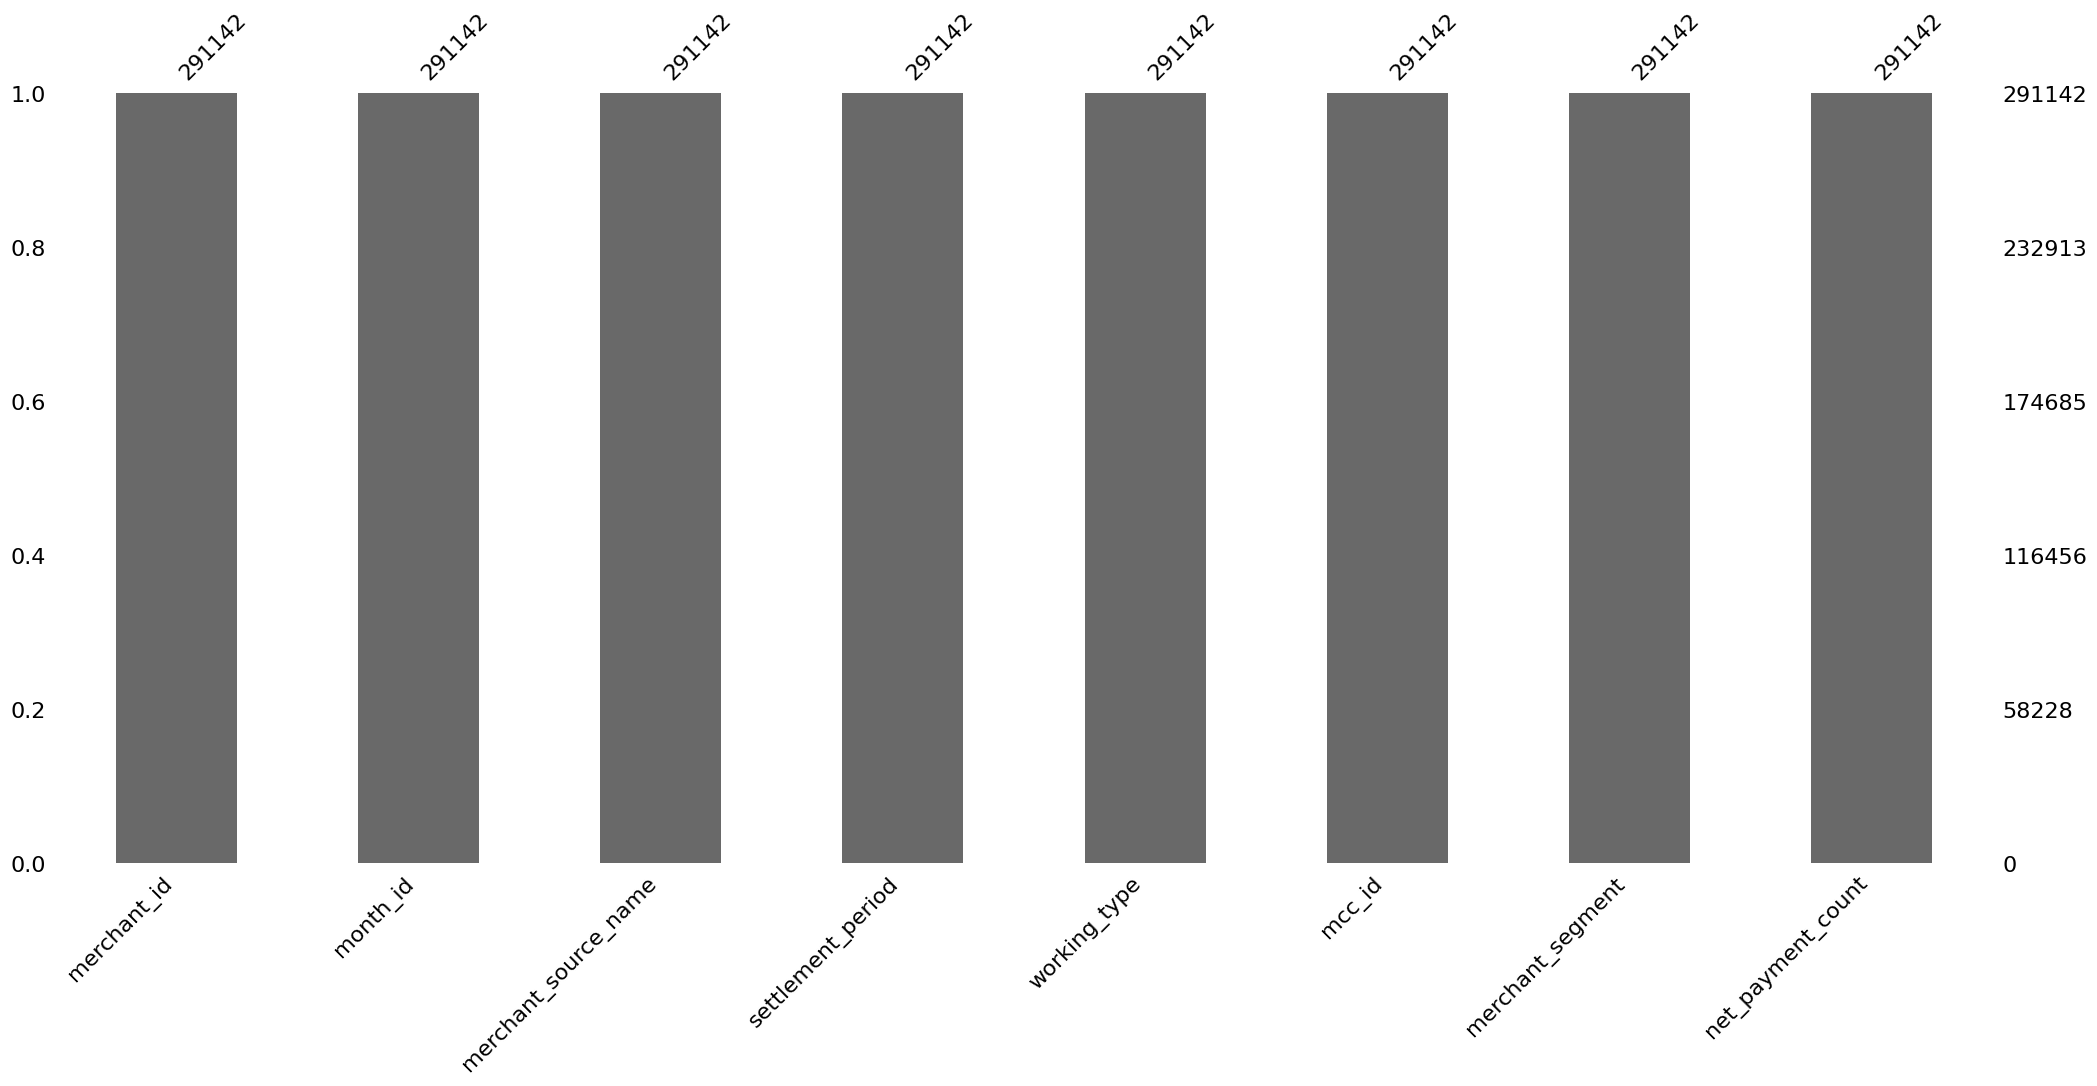

In [7]:
msno.bar(train)
plt.show()

### Unique values

In [8]:

for i in train.columns:
    print(f"{i}:\n{train[i].unique()} \n{'*'*50}")

merchant_id:
['merchant_43992' 'merchant_47611' 'merchant_40801' ... 'merchant_11346'
 'merchant_21397' 'merchant_66895'] 
**************************************************
month_id:
[202307 202301 202305 202308 202302 202304 202207 202208 202210 202211
 202209 202306 202212 202303 202309 202104 202202 202102 202003 202106
 202205 202112 202012 202004 202111 202008 202009 202203 202201 202110
 202006 202101 202001 202206 202005 202002 202105 202007 202204 202103
 202108 202010 202011 202107 202109] 
**************************************************
merchant_source_name:
['Merchant Source - 3' 'Merchant Source - 2' 'Merchant Source - 1'] 
**************************************************
settlement_period:
['Settlement Period - 3' 'Settlement Period - 1' 'Settlement Period - 2'] 
**************************************************
working_type:
['Working Type - 2' 'Working Type - 6' 'Working Type - 5'
 'Working Type - 3' 'Working Type - 4' 'Working Type - 1'] 
************************

### Average number of transactions made each month for 3 years

In [9]:
train_a=train[['month_id','net_payment_count']].groupby(['month_id'],as_index=False).mean()

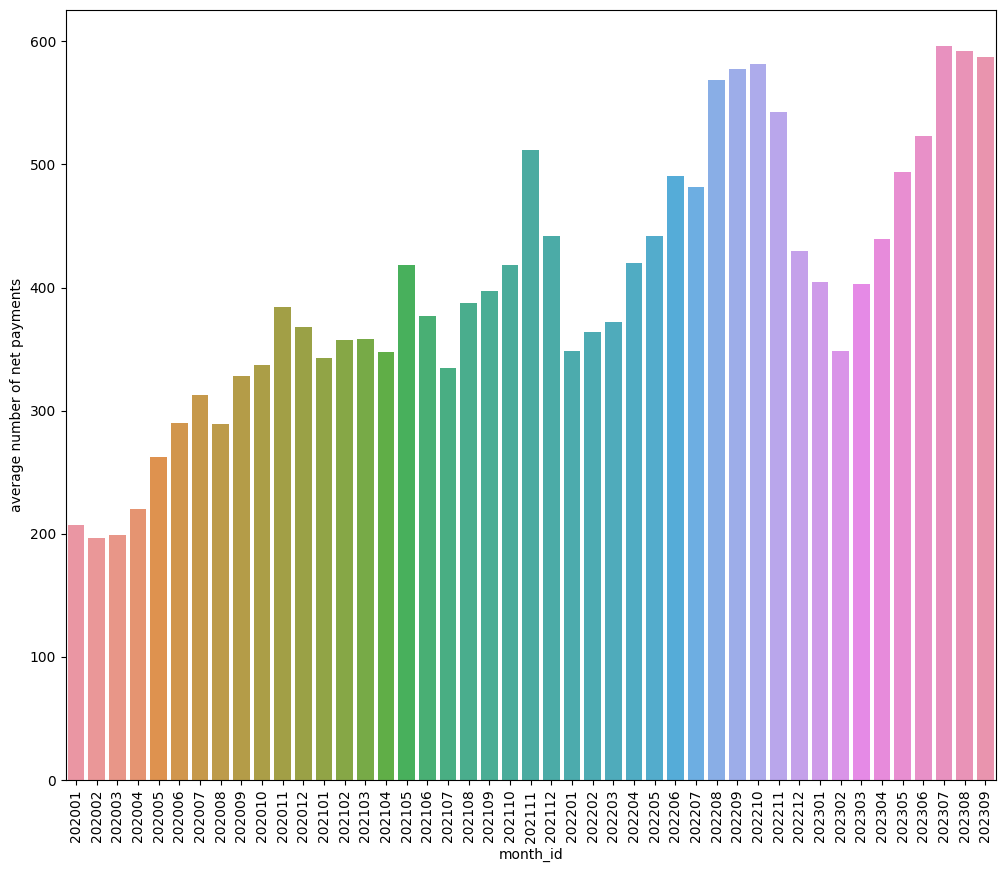

In [10]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.barplot(data=train_a,x='month_id',y='net_payment_count')
plt.ylabel('average number of net payments')
plt.xticks(rotation=90)
plt.show()

### Total number of transactions made each month for 3 years

In [11]:
train_t=train[['month_id','net_payment_count']].groupby(['month_id'],as_index=False).sum()

In [12]:
train_t.head()

,month_id,net_payment_count
0,202001,775289
1,202002,759571
2,202003,784726
3,202004,906968
4,202005,1234374


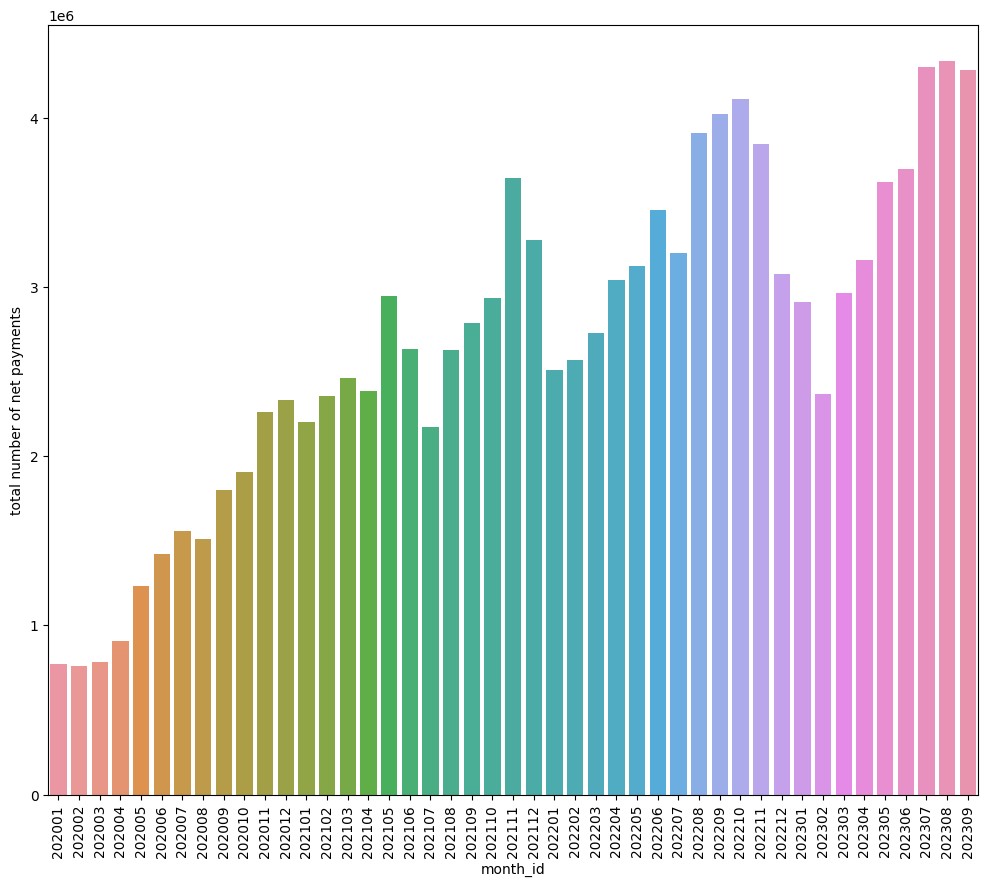

In [13]:
plt.figure(figsize=(12,10))
sns.barplot(data=train_t,x='month_id',y='net_payment_count')
plt.ylabel('total number of net payments')
plt.xticks(rotation=90)
plt.show()

In [14]:
train=train[['merchant_id','month_id','net_payment_count']]

In [15]:
train.head()

,merchant_id,month_id,net_payment_count
0,merchant_43992,202307,15106
1,merchant_43992,202301,16918
2,merchant_43992,202305,13452
3,merchant_43992,202308,16787
4,merchant_43992,202302,12428


## Linear Regression Model 

In [16]:
def Linear_regression(merchantid,data,a):
    data = data[data.merchant_id==merchantid]
    x=data.iloc[:,1].values.reshape(-1,1)
    y=data.iloc[:,2].values.reshape(-1,1)

    

    from sklearn.linear_model import LinearRegression
    
    # linear regression model
    linear_reg = LinearRegression(random_state=a)
    linear_reg.fit(x,y)
    a=int(linear_reg.predict([[202310]]))
    b=int(linear_reg.predict([[202311]]))
    c=int(linear_reg.predict([[202312]]))
    yeni_veri1 = '202310'+merchantid   
    yeni_veri2 = '202311'+merchantid
    yeni_veri3 = '202312'+merchantid
    data={"id":[yeni_veri1,yeni_veri2,yeni_veri3],"net_payment_count":[a,b,c]}
    result = pd.DataFrame(data)
    return result
    

##  polynomial Regression Model

In [17]:
def polynomial_regression(merchantid, data,a):
    

    data = data[data.merchant_id == merchantid]

    x = data.iloc[:, 1].values.reshape(-1, 1)
    y = data.iloc[:, 2].values.reshape(-1, 1)

    from sklearn.preprocessing import PolynomialFeatures

    polynomial_regression = PolynomialFeatures(degree=a)

    x_polynomial = polynomial_regression.fit_transform(x)

    from sklearn.linear_model import LinearRegression

    linear_reg = LinearRegression()
    linear_reg.fit(x_polynomial, y)

    
    a = int(linear_reg.predict(polynomial_regression.fit_transform([[202310]])))
    b = int(linear_reg.predict(polynomial_regression.fit_transform([[202311]])))
    c = int(linear_reg.predict(polynomial_regression.fit_transform([[202312]])))

    yeni_veri1 = '202310' + merchantid
    yeni_veri2 = '202311' + merchantid
    yeni_veri3 = '202312' + merchantid

    data = {"id": [yeni_veri1, yeni_veri2, yeni_veri3], "net_payment_count": [a, b, c]}
    result = pd.DataFrame(data)
    return result
    

## Random Forest Regressor Model

In [18]:
def RandomForest_Regressor(merchantid,data,a):
    data = data[data.merchant_id==merchantid]
    x=data.iloc[:,1].values.reshape(-1,1)
    y = data.iloc[:, 2].values.ravel()

    
    from sklearn.ensemble import RandomForestRegressor

    rf=RandomForestRegressor( n_estimators=1000,
               max_depth=7,
               n_jobs=-1,
               random_state=a)

    rf.fit(x,y)

   
    
    a=int(rf.predict([[202310]]))
    b=int(rf.predict([[202311]]))
    c=int(rf.predict([[202312]]))
    yeni_veri1 = '202310'+merchantid   
    yeni_veri2 = '202311'+merchantid
    yeni_veri3 = '202312'+merchantid
    data={"id":[yeni_veri1,yeni_veri2,yeni_veri3],"net_payment_count":[a,b,c]}
    result = pd.DataFrame(data)
    return result

## Decided Tree Regressor 

In [19]:
def DecidedTree_Regressor(merchantid,data):
    data = data[data.merchant_id==merchantid]
    x=data.iloc[:,1].values.reshape(-1,1)
    y=data.iloc[:,2].values.reshape(-1,1)

    
    from sklearn.tree import DecisionTreeRegressor
   
    
    tree_reg=DecisionTreeRegressor()
      # get Boostrap aggregation ensemble regressor 

    tree_reg.fit(x,y)

   
    
    a=int(tree_reg.predict([[202310]]))
    b=int(tree_reg.predict([[202311]]))
    c=int(tree_reg.predict([[202312]]))
    yeni_veri1 = '202310'+merchantid   
    yeni_veri2 = '202311'+merchantid
    yeni_veri3 = '202312'+merchantid
    data={"id":[yeni_veri1,yeni_veri2,yeni_veri3],"net_payment_count":[a,b,c]}
    result = pd.DataFrame(data)
    return result

In [20]:
liste=[]
for i in train.merchant_id.unique():
    data = DecidedTree_Regressor(str(i),train)
    liste.append(data)



In [21]:
result = pd.concat(liste)

In [22]:
result.to_csv("result.csv",index=False)